In [203]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

Four different approaches to Decentralized K-Means:

|                            | Multi-Shot | Single-Shot   |
|----------------------------|------------|---------------|
|   Expectation-Maximization | MS/EM      | SS/EM         |
|   Gradient-Descent         | MS/GD      | SS/GD         |

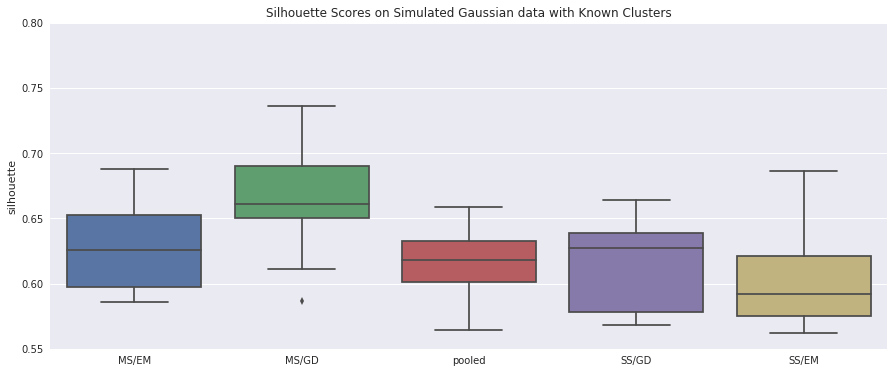

In [215]:
meas = np.load('repeat_known_k_meas.npy')
res = np.load('repeat_known_k_res.npy')
meas = meas.item()
res = res.item()
pooled = meas['pooled']
ss_gd = meas['ss_gd']
ss_em = meas['ss_em']
ms_gd = meas['ms_gd']
ms_em = meas['ms_em']
pooled = [{'name':'pooled','silhouette':v} for v in list(pooled.values())[0]]
ss_gd = [{'name':'SS/GD','silhouette':v} for v in list(ss_gd.values())[0]]
ss_em = [{'name':'SS/EM','silhouette':v} for v in list(ss_em.values())[0]]
ms_gd = [{'name':'MS/GD','silhouette':v} for v in list(ms_gd.values())[0]]
ms_em = [{'name':'MS/EM','silhouette':v} for v in list(ms_em.values())[0]]
df = pd.DataFrame(ms_em+ms_gd+pooled+ss_gd+ss_em)
sb.set()
fig = plt.figure(figsize=(15, 6))
ax = sb.boxplot(x='name',y='silhouette',data=df)
plt.title('Silhouette Scores on Simulated Gaussian data with Known Clusters')
plt.ylim([0.55,0.8])
plt.xlabel('')
plt.show()

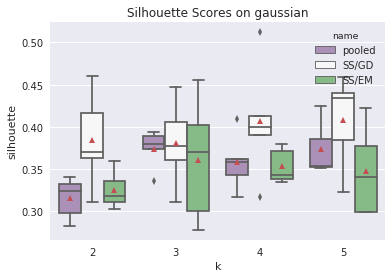

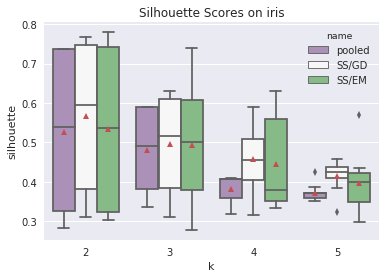

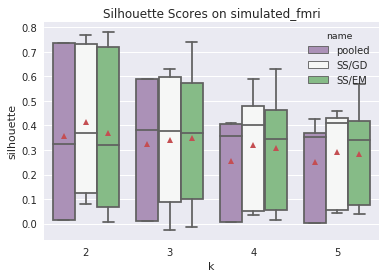

In [242]:
dsets = ['gaussian', 'iris', 'simulated_fmri']
k = [2,3,4,5]
pooled = []
ss_gd = []
ss_em = []
fig = plt.figure()
for d in dsets:
    for ki in k:
        meas = np.load('d%s_k%d_meas.npy' % (d, ki))
        res = np.load('d%s_k%d_res.pkl.npy' %(d, ki))
        meas = meas.item()
        res = res.item()
        pooledm = meas['pooled']
        ss_gdm = meas['ss_gd']
        ss_emm = meas['ss_em']
        # ms_gd = meas['ms_gd']
        # ms_em = meas['ms_em']
        pooled += [{'name':'pooled','silhouette':v,'k':ki,'dataset':d} for v in list(pooledm.values())[0]]
        ss_gd += [{'name':'SS/GD','silhouette':v,'k':ki,'dataset':d} for v in list(ss_gdm.values())[0]]
        ss_em += [{'name':'SS/EM','silhouette':v,'k':ki,'dataset':d} for v in list(ss_emm.values())[0]]
        # ms_gd = [{'name':'MS/GD','silhouette':v} for v in list(ms_gd.values())[0]]
        # ms_em = [{'name':'MS/EM','silhouette':v} for v in list(ms_em.values())[0]]
    df = pd.DataFrame(pooled+ss_gd+ss_em)
    sb.set()
    axi = fig.add_subplot()
    ax = sb.boxplot(x='k',y='silhouette',data=df,hue='name',palette="PRGn",showmeans=True)
    plt.title('Silhouette Scores on %s' % (d))
    plt.show()